# Final Term Project for DSC550 Data Mining

# Milestone 1 - Week 6

Problem -> Data -> EDA -> Features -> Model -> Experiments

**Data Set from:**

https://www.kaggle.com/datasets/thedevastator/global-video-game-sales

### Topic / Business Problem (Original)

### **Updated Topic** / Business Problem in Milestone 2

We started this course by reviewing and working with a data set that contained video game sale data for multiple games and platforms. I considered using that dataset again; there are still more insights to gain from it. However, for the final term project, I have decided to tackle an issue related to video games but narrower in scope. Specifically, I will be analyzing a data set regarding Pokémon stats from across previous and current generations of Pokémon games.  The question we will focus on is, “are the Pokémon types in Nintendo’s games balanced for gameplay, or should adjustments be made?”. 

For context, in the Pokémon games, the overall objective has been to battle other Pokémon trainers and their Pokémon to win and progress.  The first Pokémon game was released in 1996 and the list of available Pokémon has increased with the release of more recent games. 

In order to answer the question, we will need to analyze various aspects of Pokémon. This includes analyzing the attack power, defense, and health of Pokémon as well as their special attacks and special defenses. The data set selected has these variables available. The shape of the data set selected is 721 rows with 23 columns which allows for deep analysis. 

### Updated Milestone 1 Cells Based on New Data Set

I've updated the cells for milstone 1 based on choosing a new data set. I updated the data set to have a better 'Business Problem' in response to the Milestone 1 feddback.

In [1]:
# importing libraries
import numpy as np
import pandas as pd

In [2]:
# loading csv with pandas function read_csv()
df = pd.read_csv("vgsales.csv")

In [3]:
# reviewing first 10 rows of dataframe
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
# viewing last 10 rows of the dataframe
df.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16588,16591,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


In [5]:
# using .info to review the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
# checking the shape of the data frame
df.shape

(16598, 11)

## Graph Analysis of Data

In [7]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
viridis = mpl.colormaps['viridis'].resampled(8)

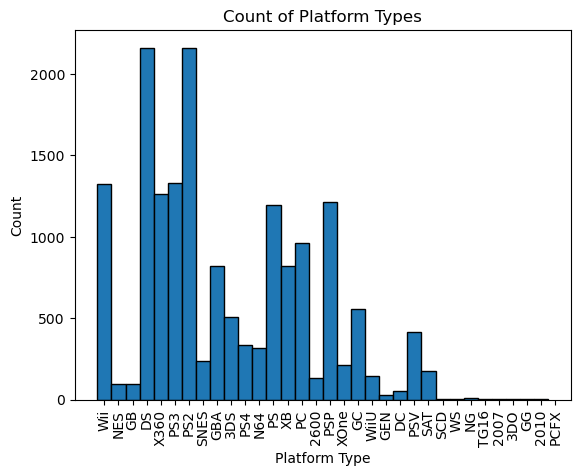

In [8]:
# plotting a histogram of the 'type_1' column in the data frame
plt.hist(df['Platform'],edgecolor= "black",align='mid', bins=np.arange(33)-0.5)
plt.xticks(rotation = 90)
plt.xlabel("Platform Type")
plt.ylabel("Count")
plt.title("Count of Platform Types")
plt.show()

In [9]:
# creating a platform variable from the unique values of the column
platform_type = (df['Platform'].unique())

In [10]:
# viewing the contents of variable created 
platform_type

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '2007', '3DO', 'GG', '2010', 'PCFX'], dtype=object)

In [11]:
plt.figure(figsize=(25, 15), dpi= 800, facecolor='w')

for i, platform_type in enumerate(platform_type):
    plt.scatter(df['Rank'], df['NA_Sales'], label=str(platform_type))
    
plt.legend(fontsize=12)
plt.show()    

I was still unable to get this plot to function correctly but I hope to have it completed before the final submission

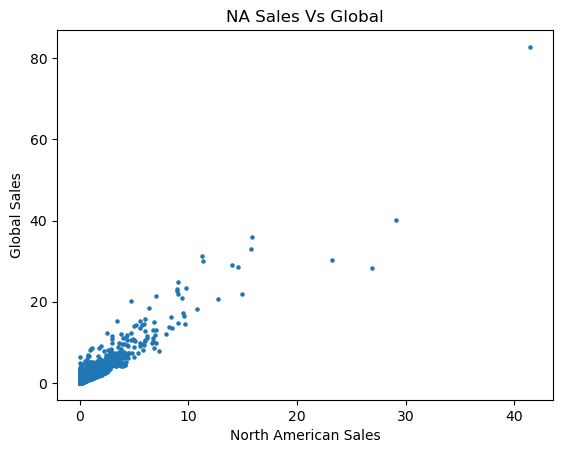

In [12]:
# Plottting the Attack vs Defense columns from the data frame 
plt.scatter(df['NA_Sales'], df['Global_Sales'], s=5)
plt.xlabel("North American Sales")
plt.ylabel('Global Sales')
plt.title("NA Sales Vs Global")
plt.show()

Without doing a full analysis of the correlation of the two variables, it visually appears that there is a strong positive correlation between North American Sales and Global Sales. This indicates that if your sales are good in North America, they should be good globally. 

In [13]:
# importing additional libraries
import seaborn as sns

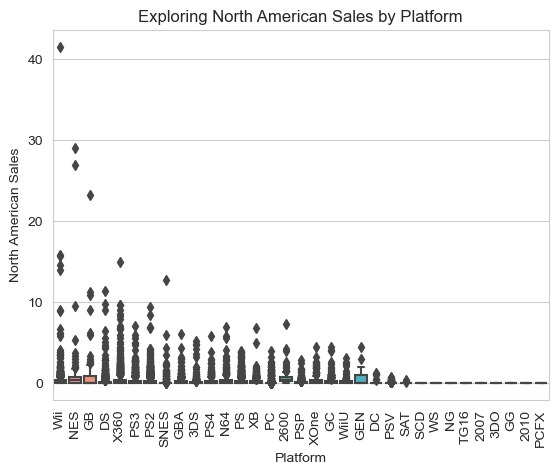

In [14]:
# plotting a box plot to further evaluate the attack power of pokemon types
sns.set_style("whitegrid") 
sns.boxplot(x = 'Platform', y = 'NA_Sales', data = df) 
plt.rcParams['figure.figsize'] = [18, 11]
plt.rcParams['figure.dpi'] = 125 # 200 e.g. is really fine, but slower
plt.xticks(rotation=90)
plt.xlabel('Platform')
plt.ylabel('North American Sales')
plt.title('Exploring North American Sales by Platform')
plt.show()

# Milestone 2 - Week 8

## Data Preperation

### Adjusted Topic / Business Problem

In review of the feedback for Milestone 1, I've decdided to adjust my project to create case for a better Business Problem.

I have chosen to migrate to a different data set; a data set that was used early on in the course. I have imported the video game sales data set once again, to continue my work with it. I have adjusted my "Business Problem" to the following:

The business problem, is the consideration of opening a video game retail store, and how to stock the store with the appropriate video games from different platforms. 

By using a model, we can find how the performance of previous sales may dictate specifc publishers, platforms or genres sale performance. 

In [15]:
# reviewing the first 5 rows of the data frame to refresh
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
# verifying the new shape of the data frame
df.shape

(16598, 11)

In [17]:
# dropping rows that contain the unwanted platforms based on the EDA process
df.drop(df[df.Platform.isin(['DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '2007', '3DO', 'GG', '2010', 'PCFX'])].index, inplace = True)

I have decided to drop the values above based on the boxplot performed in Milestone 1 as well as the histogram performed in Milestone 1. The platorms dropped will add littel value if any to the model and analysis as the sales are extremely low for that particular platforms.

In [18]:
# checking the counts for the remainging platforms
df['Platform'].value_counts()

Platform
DS      2163
PS2     2161
PS3     1328
Wii     1325
X360    1265
PSP     1212
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PS4      336
N64      319
SNES     239
XOne     213
WiiU     143
2600     133
NES       98
GB        98
GEN       27
Name: count, dtype: int64

In [19]:
# checking for null or NaN values in the dataframe 
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            270
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [20]:
# dropping rows with NaN values in the 'Publisher' column
df.dropna(subset = ['Publisher'], inplace = True)

I have dropped the rows above since removing the missing publisher names should have little to no effect on the model to be created in the future.

In [21]:
# checking remaining NaN values in data frame
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            248
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [22]:
# creating median variable to fill the NaN in the Year column
median = df['Year'].median()

In [23]:
# printing the variables 
print(f'The median Year is {median}')

The median Year is 2007.0


In [24]:
# reviewing the counts of different years
df['Year'].value_counts()

Year
2009    1431
2008    1427
2010    1256
2007    1199
2011    1118
2006    1008
2005     936
2002     828
2003     775
2004     744
2012     601
2015     501
2013     483
2014     478
2001     472
1998     343
2000     327
1999     321
2016     284
1997     255
1996     222
1995     159
1994      92
1993      57
1981      46
1992      42
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2020       1
2017       1
Name: count, dtype: int64

In [25]:
# filling the NaN values in the 'Year' column
df['Year'].fillna(2007, inplace = True)

In [26]:
# converting year from float64 to int64
df['Year'] = df['Year'].astype(np.int64)

In [27]:
# checking all NaN values are gone 
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

After reviewing the counts of all years in the 'Year' column, I felt it best to use the median value of year, which was 2007, to fill in the NaN values. It seemed to me the best method to retain the rows and not create a significant impact on the data set. Median is resistant to outliers 

In [28]:
# reviewing the updated data frame
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Partial Update to Milestone Two 

In [29]:
# calculate IQR for column Year
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)
IQR = Q3 - Q1

In [30]:
# identify outliers in Year column
threshold = 1.5
outliers = df[(df['Year'] < Q1 - threshold * IQR) | (df['Year'] > Q3 + threshold * IQR)]

In [31]:
# drop rows containing outliers
df = df.drop(outliers.index)

In [32]:
df.shape

(15567, 11)

In [33]:
# calculate IQR for column NA_Sales
Q1 = df['NA_Sales'].quantile(0.25)
Q3 = df['NA_Sales'].quantile(0.75)
IQR = Q3 - Q1

In [34]:
# identify outliers in NA_Sales column
threshold = 1.5
outliers2 = df[(df['NA_Sales'] < Q1 - threshold * IQR) | (df['NA_Sales'] > Q3 + threshold * IQR)]

In [35]:
# drop rows containing outliers
df = df.drop(outliers2.index)

In [36]:
# calculate IQR for column EU_Sales
Q1 = df['EU_Sales'].quantile(0.25)
Q3 = df['EU_Sales'].quantile(0.75)
IQR = Q3 - Q1

In [37]:
# identify outliers in EU_Sales column
threshold = 1.5
outliers3 = df[(df['EU_Sales'] < Q1 - threshold * IQR) | (df['EU_Sales'] > Q3 + threshold * IQR)]

In [38]:
# drop rows containing outliers
df = df.drop(outliers3.index)

In [39]:
# calculate IQR for column JP_Sales
Q1 = df['JP_Sales'].quantile(0.25)
Q3 = df['JP_Sales'].quantile(0.75)
IQR = Q3 - Q1

In [40]:
# identify outliers in JP_Sales column
threshold = 1.5
outliers4 = df[(df['JP_Sales'] < Q1 - threshold * IQR) | (df['JP_Sales'] > Q3 + threshold * IQR)]

In [41]:
# drop rows containing outliers
df = df.drop(outliers4.index)

In [42]:
# calculate IQR for column Other_Sales
Q1 = df['Other_Sales'].quantile(0.25)
Q3 = df['Other_Sales'].quantile(0.75)
IQR = Q3 - Q1

In [43]:
# identify outliers in Other_Sales column
threshold = 1.5
outliers5 = df[(df['JP_Sales'] < Q1 - threshold * IQR) | (df['JP_Sales'] > Q3 + threshold * IQR)]

In [44]:
# drop rows containing outliers
df = df.drop(outliers5.index)

In [45]:
# dropping additional columns
df = df.drop(['Name', 'Rank'], axis = 1)

In [46]:
df.shape

(10392, 9)

In [47]:
# checking the data types in the columns of the data frame
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,10392.000000,10392.000000,10392.000000,10392.000000,10392.000000,10392.000000
mean,2006.973056,0.101831,0.037728,0.004689,0.014827,0.160261
std,4.486407,0.116738,0.048872,0.011490,0.044568,0.163346
min,1993.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2004.000000,0.010000,0.000000,0.000000,0.000000,0.040000
50%,2007.000000,0.070000,0.020000,0.000000,0.010000,0.100000
75%,2010.000000,0.140000,0.050000,0.000000,0.020000,0.230000
max,2020.000000,0.600000,0.200000,0.050000,1.820000,2.280000


In [48]:
# utilizing the get_dummies() function 
df_dummies = pd.get_dummies(df, drop_first=True, dummy_na=True, dtype=int)

In [49]:
# reviewing the new data frame
df_dummies.head(10)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,...,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_fonfun,Publisher_iWin,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,Publisher_responDESIGN,Publisher_nan
701,2008,0.38,0.07,0.01,1.82,2.28,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
918,2007,0.47,0.08,0.00,1.33,1.87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1212,2003,0.58,0.00,0.00,0.09,1.54,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1249,2007,0.35,0.03,0.00,1.13,1.51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1258,2000,0.00,0.07,0.05,0.20,1.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1264,2008,0.00,0.20,0.00,0.16,1.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1335,2013,0.48,0.00,0.00,0.19,1.44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1381,2008,0.38,0.08,0.03,0.93,1.40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1412,2008,0.60,0.01,0.00,0.76,1.37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1426,2008,0.23,0.04,0.00,1.09,1.36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
before = df.shape
after = df_dummies.shape

In [51]:
print(f'Before dummies the data frame shape was {before} and after dummies the shape is {after}')

Before dummies the data frame shape was (10392, 9) and after dummies the shape is (10392, 518)


### Conclusion

At the conclusion of Milestone 2, the data frame should be ready for modeling. The data set has been cleaned and cleared of NaN values. The categorical features have been converted to dummies, while dropping the first. The 'Year' column has also had it's data type transformed from a string, to a float, then finally to an int64.

There was not much cleaning required as the data set did not contain many NaN values and the existing features should be enough to create a working model from.

# Milestone 3 - Week 10

## Model Building and Evaluation

**Feedback Regarding Milestone 2**

*Ruben, a few things here. First, what exactly are you predicting? Global sale? Then, you need to drop the NA Sales, EU sales, etc. Also, I don't think it makes sense to one-hot encod the game name as these are essentially unique. You could do something like a tfidf vectorization with the names as this could help distinguish important words like "Mario" or "Halo". I think you need to be more careful about how you handle your features.*

**Clarrification on Model**

For the project, I am attempting to model the N.A Sales based on the other available features. With this being the case, I think it should be safe to drop the game names and not perform one-hot encoding on them. Using a Multiple Linear Regression model should be able to predict N.A. Sales in regard to all other features. 

Target is N.A. Sales. 

### Evaluation of the Data Frames

I'll be evaluating the data and making additonal changes prior to selecting and fitting the model. I'll be accounting for the Milestone 2 feedback as well.

In [52]:
# reviewing the updated data frame before the dummies encoding 
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
701,PS2,2008,Sports,Electronic Arts,0.38,0.07,0.01,1.82,2.28
918,PS2,2007,Misc,Disney Interactive Studios,0.47,0.08,0.00,1.33,1.87
1212,PC,2003,Strategy,Activision,0.58,0.00,0.00,0.09,1.54
1249,PS2,2007,Action,Electronic Arts,0.35,0.03,0.00,1.13,1.51
1258,PS2,2000,Sports,Electronic Arts,0.00,0.07,0.05,0.20,1.50
...,...,...,...,...,...,...,...,...,...
16593,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [53]:
# reviewing the dummies created in prior Milestone that will be removed
df_dummies.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,...,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_fonfun,Publisher_iWin,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,Publisher_responDESIGN,Publisher_nan
701,2008,0.38,0.07,0.01,1.82,2.28,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
918,2007,0.47,0.08,0.00,1.33,1.87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1212,2003,0.58,0.00,0.00,0.09,1.54,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1249,2007,0.35,0.03,0.00,1.13,1.51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1258,2000,0.00,0.07,0.05,0.20,1.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After re-evaluation I've dedcided to drop additional features that will not be useuful to the regression model. The target being NA Sales with the features being the remaining columns. 

This includes the removal of the 'Name' columns. One-hot encoding will not be applied to the 'Name' column.

## Update to Milestone Three

In [54]:
# dropping additional column
df2 = df.drop(['Global_Sales'], axis = 1)

In [55]:
# reviewing the first 5 rows
df2.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
701,PS2,2008,Sports,Electronic Arts,0.38,0.07,0.01,1.82
918,PS2,2007,Misc,Disney Interactive Studios,0.47,0.08,0.00,1.33
1212,PC,2003,Strategy,Activision,0.58,0.00,0.00,0.09
1249,PS2,2007,Action,Electronic Arts,0.35,0.03,0.00,1.13
1258,PS2,2000,Sports,Electronic Arts,0.00,0.07,0.05,0.20


In [56]:
# utilizing the get_dummies() function 
df2_dummies = pd.get_dummies(df2, drop_first=True, dummy_na=True, dtype=int)

One-hot encoding makes more sense here since the categorical values do not have any ordinal significance.

In [57]:
# reviewing correlation matrix
df2_dummies.corr()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_GEN,...,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_fonfun,Publisher_iWin,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,Publisher_responDESIGN,Publisher_nan
Year,1.000000,-0.134479,-0.083863,0.145887,0.041379,0.203171,0.126052,-0.210670,-0.166463,-0.065402,...,-0.030298,0.028208,0.015725,0.017738,0.002246,0.008806,0.021732,0.017553,-0.007648,NaN
NA_Sales,-0.134479,1.000000,0.418935,-0.231931,0.276993,-0.058961,-0.015413,0.058070,0.059962,-0.019140,...,-0.012349,0.000616,-0.003231,-0.013125,-0.008558,-0.008558,-0.012103,-0.006877,-0.006755,NaN
EU_Sales,-0.083863,0.418935,1.000000,-0.200311,0.259766,-0.031496,-0.201529,0.050610,-0.008987,-0.016938,...,-0.037516,-0.042907,-0.029790,0.001020,-0.007574,0.002463,-0.010711,0.004471,-0.005033,NaN
JP_Sales,0.145887,-0.231931,-0.200311,1.000000,-0.065422,0.110515,0.039327,-0.084979,-0.071723,0.071249,...,-0.038935,-0.022683,-0.014986,-0.008955,0.013073,-0.004004,0.018489,-0.004004,-0.005663,NaN
Other_Sales,0.041379,0.276993,0.259766,-0.065422,1.000000,-0.026356,-0.055318,-0.071227,-0.052998,-0.007299,...,-0.019544,-0.011475,-0.008146,0.000578,-0.003264,-0.001063,-0.004616,-0.001063,-0.003059,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Publisher_iWin,0.008806,-0.008558,0.002463,-0.004004,-0.001063,-0.001550,0.023159,-0.002490,-0.002123,-0.000215,...,-0.000977,-0.000545,-0.000409,-0.000215,-0.000096,1.000000,-0.000136,-0.000096,-0.000136,NaN
Publisher_imageepoch Inc.,0.021732,-0.012103,-0.010711,0.018489,-0.004616,0.087830,-0.005877,-0.003522,-0.003003,-0.000304,...,-0.001381,-0.000771,-0.000578,-0.000304,-0.000136,-0.000136,1.000000,-0.000136,-0.000192,NaN
Publisher_inXile Entertainment,0.017553,-0.006877,0.004471,-0.004004,-0.001063,-0.001550,-0.004156,-0.002490,-0.002123,-0.000215,...,-0.000977,-0.000545,-0.000409,-0.000215,-0.000096,-0.000096,-0.000136,1.000000,-0.000136,NaN
Publisher_responDESIGN,-0.007648,-0.006755,-0.005033,-0.005663,-0.003059,-0.002192,-0.005877,-0.003522,-0.003003,-0.000304,...,-0.001381,-0.000771,-0.000578,-0.000304,-0.000136,-0.000136,-0.000192,-0.000136,1.000000,NaN


### Model Selection

The model selection for this particular project is a linear regressin model, more specifically a multiple linear regression model as I will be using multiple features. It seems like a basic model but it also seems to be the best fit for the feature selections and target we are trying to predict. 

In [58]:
# import additional libraries for model creation and evaluation
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Splitting the Data into Train and Test

I will be using the sklearn library to split the data into train and test sets. The test size will be 20% of the data and random state set to zero for reproducable results.

In [59]:
# splitting the data frame into train and test sets
X = df2_dummies.drop('NA_Sales', axis = 1)
y = df2_dummies['NA_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Selecting, Initializing and Fitting the Model to the Training Data

In the steps that follow, I create the linear regression model and then fit the training data to the model. Prediction are then made based off of the rerression model. 

In [60]:
# creating the instance of Linear Regression
model = LinearRegression()

In [61]:
# fitting the model to the training data
model.fit(X_train,y_train)

LinearRegression()

In [62]:
# creating prediciton using the training data 
predictions = model.predict(X_train) # predicted value of y

In [63]:
# line of best fit
a, b = np.polyfit(y_train, predictions, 1)

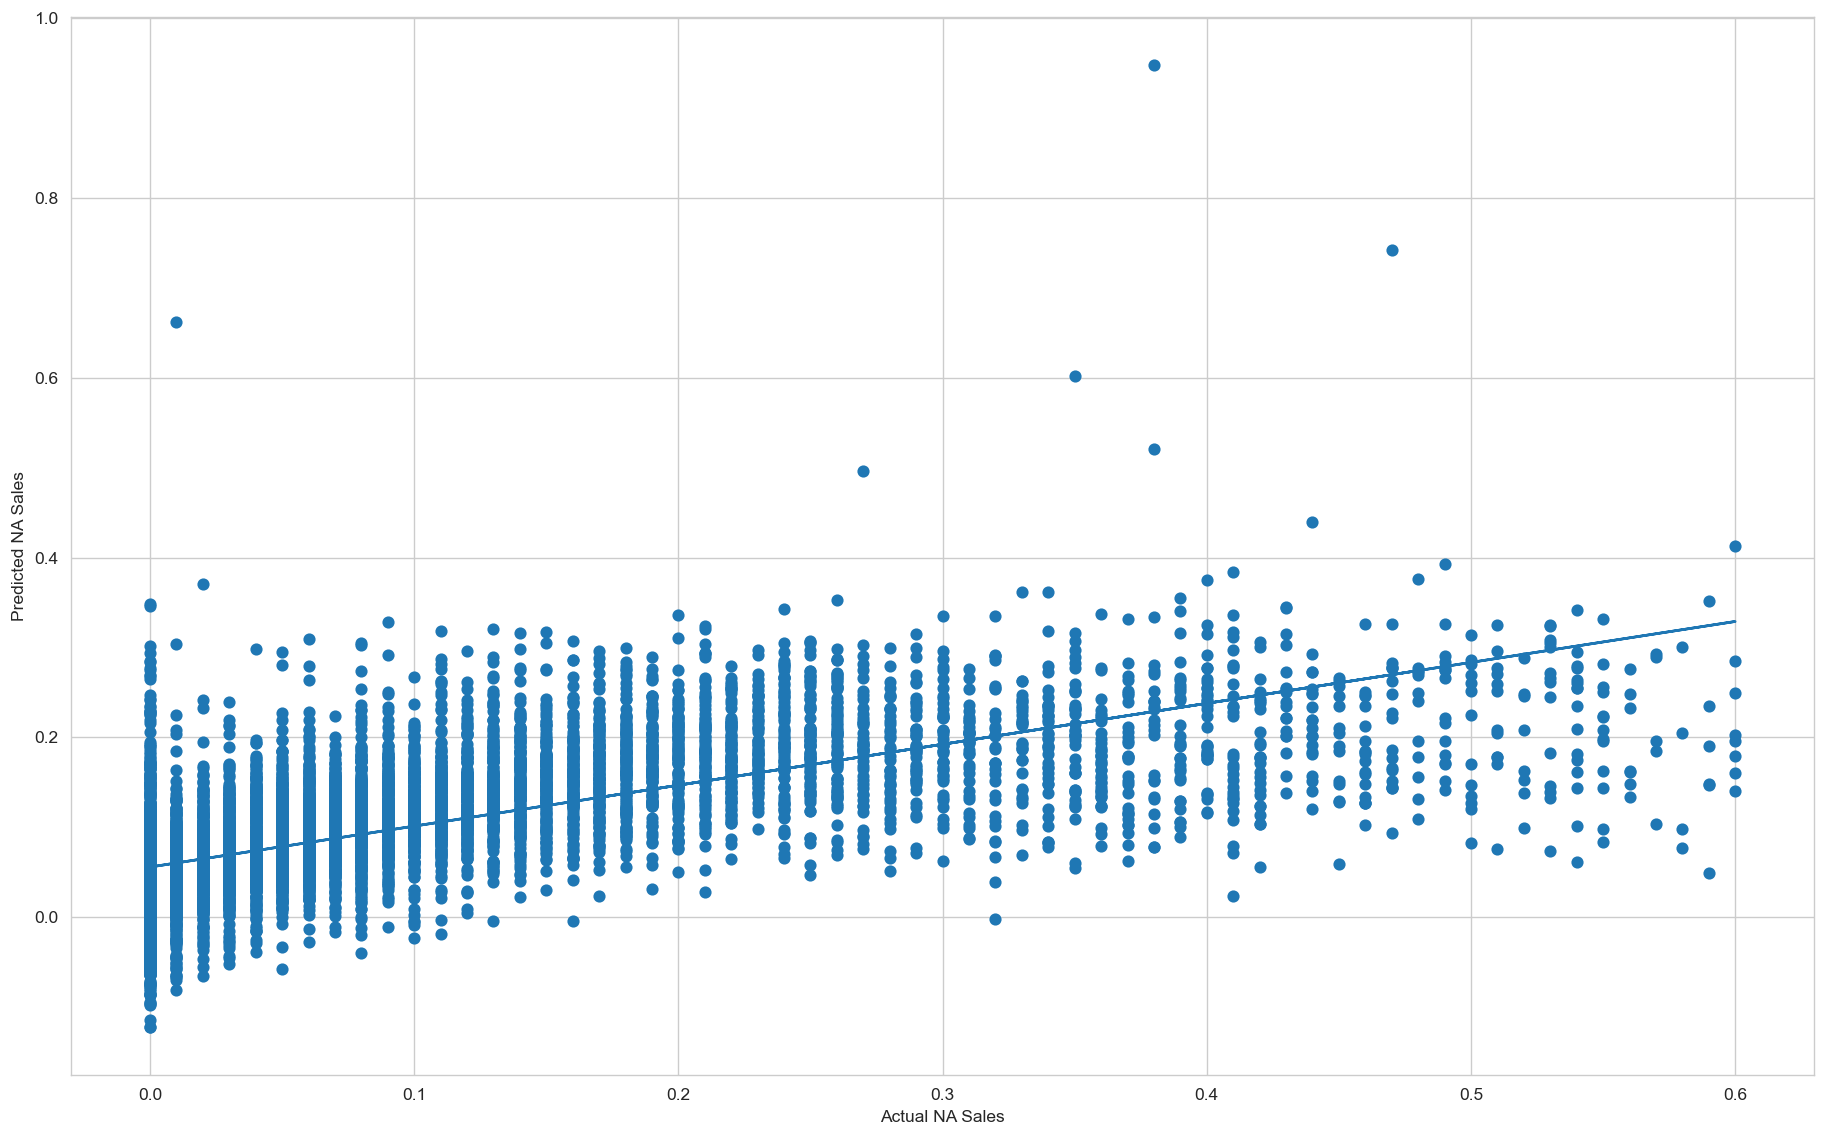

In [64]:
# plotting the linear regression model with line of best fit
plt.scatter(y_train, predictions)
plt.plot(y_train, a*y_train+b)
plt.xlabel('Actual NA Sales')
plt.ylabel('Predicted NA Sales')
plt.show()

### Evaluating the Training Results with R-Squared and Root Mean Squared Error

The best metrics for evaluating a linear regression model are R-squared and RMSE. The R-squared value falls in a range of 0 to 1, the closer the value is to 1 the better the model is. RMSE is a value that represents the difference between the predicted and actual values. The smaller the RMSE value the better the predictions were.

In [65]:
# importing additional libraries
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [66]:
# calculating r-squared
r2_score(y_train,predictions)

0.4554001378799074

In [67]:
# calculating RMSE
sqrt(mean_squared_error(y_train, predictions))

0.08616368714649555

### Fitting the Trained Model to the Test Data

After training the model it is ready to be used with the test data set. 

In [68]:
# fitting the model to the training data
model.fit(X_test,y_test)

LinearRegression()

In [69]:
# creating prediciton using the training data 
predictions_test = model.predict(X_test) # predicted value of y

In [70]:
# line of best fit
a, b = np.polyfit(y_test, predictions_test, 1)

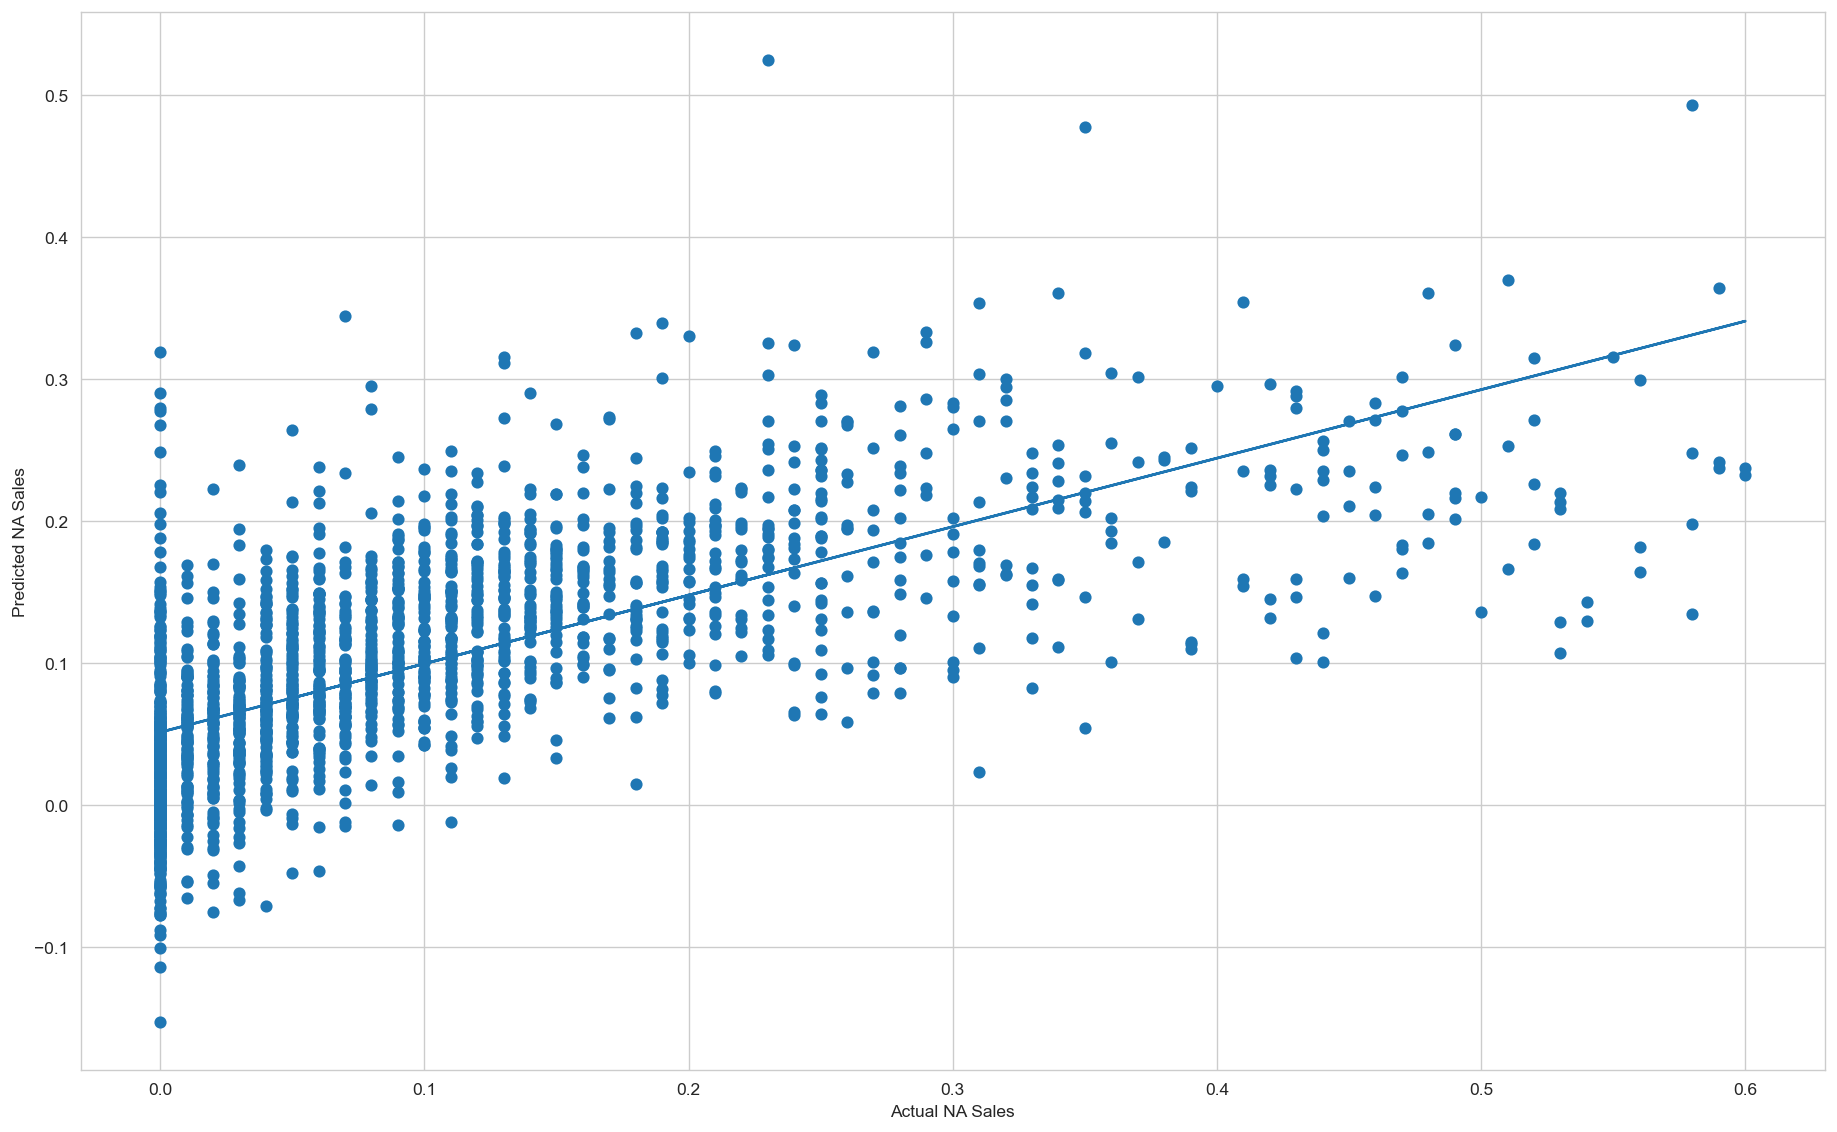

In [71]:
# plotting the linear regression model with line of best fit
plt.scatter(y_test, predictions_test)
plt.plot(y_test, a*y_test+b)
plt.xlabel('Actual NA Sales')
plt.ylabel('Predicted NA Sales')
plt.show()

### Evaluating the Test Results with R-Squared and Root Mean Squared Error

Based on the results below, the model performed well on the test data set but did slightly underperform compared to the results from the training data set. 

The R-sqaured value decreased while the RMSE increased, indicating a larger difference between predicted and actual values. 

In [72]:
# calculating r-squared
r2_score(y_test,predictions_test)

0.47082567672266995

In [73]:
# calculating RMSE
sqrt(mean_squared_error(y_test, predictions_test))

0.08481517782916481

### Final Changes to the Model

The final changes of the project were based on the additonal feed back.

These changes included removing outliers from the sales data and removing addtional features. This can bee seen in Milestone Two. 